In [9]:
# useful additional packages 
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
import networkx as nx

from qiskit import Aer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import TwoLocal, RealAmplitudes
from qiskit.tools.visualization import plot_histogram
from qiskit.optimization.applications.ising import tsp, max_cut
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.aqua.algorithms import VQE, NumPyEigensolver
from qiskit.aqua.components.optimizers import SPSA, COBYLA

#from qiskit import IBMQ
#provider = IBMQ.load_account()

distance
 [[ 0.  5. 33. 77.]
 [ 5.  0. 36. 79.]
 [33. 36.  0. 44.]
 [77. 79. 44.  0.]]


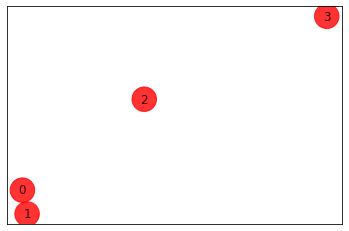

In [10]:
# Generating a graph of n nodes
n = 4

num_qubits = n ** 2
ins = tsp.random_tsp(n)
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
colors = ['r' for node in G.nodes()]
pos = {k: v for k, v in enumerate(ins.coord)}
default_axes = plt.axes(frameon=True)
nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
print('distance\n', ins.w)

order = (0, 1, 2, 3) Distance = 162.0
order = (0, 1, 3, 2) Distance = 161.0
Best order from brute force = (0, 1, 3, 2) with total distance = 161.0


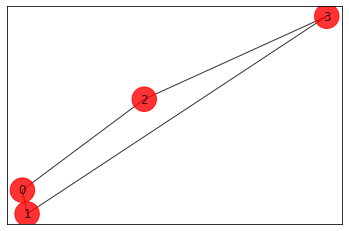

In [11]:
from itertools import permutations

def brute_force_tsp(w, N):
    a=list(permutations(range(1,N)))
    last_best_distance = 1e10
    for i in a:
        distance = 0
        pre_j = 0
        for j in i:
            distance = distance + w[j,pre_j]
            pre_j = j
        distance = distance + w[pre_j,0]
        order = (0,) + i
        if distance < last_best_distance:
            best_order = order
            last_best_distance = distance
            print('order = ' + str(order) + ' Distance = ' + str(distance))
    return last_best_distance, best_order
  
best_distance, best_order = brute_force_tsp(ins.w, ins.dim)
print('Best order from brute force = ' + str(best_order) + ' with total distance = ' + str(best_distance))

def draw_tsp_solution(G, order, colors, pos):
    G2 = G.copy()
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G2, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)

draw_tsp_solution(G, best_order, colors, pos)

In [12]:
qubitOp, offset = tsp.get_operator(ins)

energy: [-1600387.+0.j]
tsp objective: [161.+0.j]
feasible: True
solution: [0, 1, 3, 2]
solution objective: 161.0


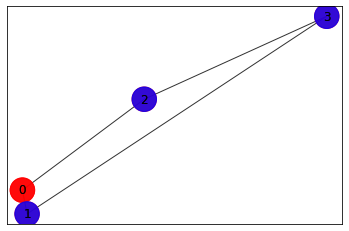

In [13]:
### Checking that the full Hamiltonian gives the right cost 
#Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector

from qiskit.aqua.algorithms import NumPyEigensolver
ee = NumPyEigensolver(qubitOp, k=1)
result = ee.run()

print('energy:', result['eigenvalues'])
print('tsp objective:', result['eigenvalues'] + offset)
x = sample_most_likely(result['eigenstates'][0])
print('feasible:', tsp.tsp_feasible(x))
z = tsp.get_tsp_solution(x)
print('solution:', z)
print('solution objective:', tsp.tsp_value(z, ins.w))
draw_tsp_solution(G, z, colors, pos)

colors = ['r' if tsp.get_tsp_solution(x)[i] == 0 else 'b' for i in range(n)]
nx.draw_networkx(G, node_color=colors, node_size=600, alpha = .8, pos=pos)

In [14]:
# Callback to print VQE iterations
def vqe_callback(count, params, mean, std):
    #print(count, params, mean, std)
    print(count, mean, std)

In [15]:
seed = 999

spsa = SPSA(max_trials=100)
#ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=5, entanglement='linear')
#ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=3, entanglement='full')
ry = RealAmplitudes(qubitOp.num_qubits, reps=3, entanglement='full')

vqe = VQE(qubitOp, ry, spsa, callback=vqe_callback)

backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = vqe.run(quantum_instance)

print('energy:', result.eigenvalue.real)
print('time:', result.optimizer_time)
x = sample_most_likely(result.eigenstate)
print('feasible:', tsp.tsp_feasible(x))
z = tsp.get_tsp_solution(x)
print('solution:', z)
print('solution objective:', tsp.tsp_value(z, ins.w))
draw_tsp_solution(G, z, colors, pos)

1 158079.341796875 25181.970544814478
2 165489.42578125 25641.122304980283
3 117030.3369140625 24245.09841299478
4 190698.5234375 24490.566957914383
5 23645.52734375 24606.250305866295
6 274908.42578125 24881.820613019874
7 166867.375 23948.564148820944
8 231908.3876953125 25287.344691808506
9 86352.8583984375 24970.03415648198
10 244640.853515625 24392.07417779021
11 232118.65234375 25688.16141905743
12 90464.203125 23749.82878956691
13 206511.6005859375 25996.694441105785
14 204376.8779296875 24800.01648470396
15 222546.7158203125 25323.329626247807
16 125437.390625 25199.997853418296
17 140296.5185546875 24180.886589397287
18 269815.37109375 25945.66765309215
19 190885.3974609375 26129.082247210325
20 247352.5498046875 26391.126432144203
21 105319.16503906253 24474.695105930252
22 199878.7314453125 25700.740597843942
23 -1563.7978515625 25043.72561553389
24 362638.556640625 25474.599841306743
25 68188.681640625 25402.473450759273
26 292298.6494140625 24864.08271658877
27 -12516.7099

207 -776283.7890625 14375.812367051456
208 -771784.759765625 16625.192585188954
209 -799911.880859375 15388.666396476681
210 -774324.4541015625 15953.078006104959
211 -759876.5947265625 15503.832079365604
212 -804600.3828125 15310.900740123136
213 -774332.27734375 15685.467953513846
214 -795805.39453125 15579.226692415352
215 -818670.1923828125 15447.428829423421
216 -772366.6513671875 15662.855606485302
217 -786625.634765625 16307.72595478273
218 -773353.6513671875 16098.080822219203
219 -777060.75390625 15089.778046531796
220 -807334.2666015625 15132.069963792685
221 -826292.2294921875 14943.237823849053
222 -750485.4921875 16995.785502423147
223 -828245.6630859375 14785.152041289843
224 -765143.6201171875 15490.651383376618
225 -783117.2216796875 15727.726348779644
226 -804407.62109375 15815.021191094434
227 -798742.7529296875 15458.072215580174
228 -819846.5302734375 14953.835957103483
229 -812029.1083984375 14999.933439838855
230 -821401.97265625 15503.144526760849
231 -838592.407

AssertionError: 

In [ ]:
plot_histogram(result.eigenstate)